In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#data preperation

#get data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

#center data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32')/255

#categorize output
#utils.to_categorical --> 10
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

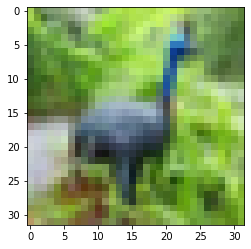

In [3]:
plt.imshow(x_train[8])
plt.imshow(x_train[6])

In [4]:
#16
#CNN model

#keras sequential
model1 = keras.Sequential()

#2layers, maxpool, dropout
model1.add(keras.layers.Conv2D(filters=32,kernel_size=(3, 3),activation="relu", input_shape=(32, 32, 3), padding="same"))
model1.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu"))
model1.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model1.add(keras.layers.Dropout(rate=.25))

#check all 4 lines are needed, or only last 3
#repetition of previous part
model1.add(keras.layers.Conv2D(filters=32,kernel_size=(3, 3),activation="relu"))
model1.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu"))
model1.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model1.add(keras.layers.Dropout(rate=.25))

#flatten result
model1.add(keras.layers.Flatten())

#fully connected layer + dropout
model1.add(keras.layers.Dense(512, activation="relu"))
model1.add(keras.layers.Dropout(rate=.5))

#output layer -- 10 categories
model1.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
#compile
model1.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.0001,
decay=1e-6), metrics='accuracy')

In [5]:
#model fit saved in history
history1 = model1.fit(x_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 155s 97ms/step - loss: 2.1173 - accuracy: 0.2036 - val_loss: 1.6884 - val_accuracy: 0.3885
Epoch 2/20
1563/1563 [==============================] - 146s 94ms/step - loss: 1.6981 - accuracy: 0.3776 - val_loss: 1.5062 - val_accuracy: 0.4530
Epoch 3/20
1563/1563 [==============================] - 147s 94ms/step - loss: 1.5311 - accuracy: 0.4344 - val_loss: 1.4094 - val_accuracy: 0.4881
Epoch 4/20
1563/1563 [==============================] - 174s 111ms/step - loss: 1.4450 - accuracy: 0.4757 - val_loss: 1.3619 - val_accuracy: 0.5102
Epoch 5/20
1563/1563 [==============================] - 155s 99ms/step - loss: 1.3859 - accuracy: 0.5034 - val_loss: 1.2782 - val_accuracy: 0.5391
Epoch 6/20
1563/1563 [==============================] - 144s 92ms/step - loss: 1.3322 - accuracy: 0.5220 - val_loss: 1.2512 - val_accuracy: 0.5490
Epoch 7/20
1563/1563 [==============================] - 139s 89ms/step - loss: 1.2738 - accuracy: 0.5471 - val_loss: 

In [10]:
# model1.save("model_1.3")
model1.summary()

INFO:tensorflow:Assets written to: model_1.3\assets
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_

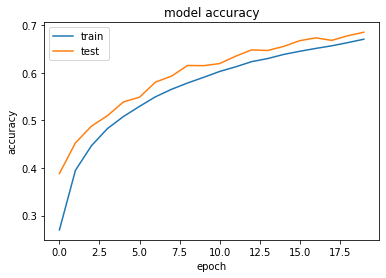

In [7]:
#history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

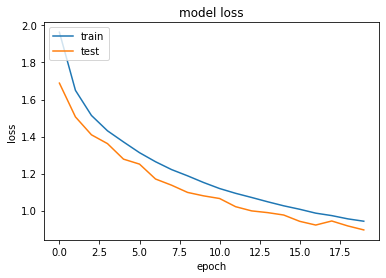

In [8]:
#History for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
loss, accuracy = model1.evaluate(x_test, y_test, verbose=0)
print(f" loss = {round(loss,3)} \n accuracy = {round(accuracy,3)}")

 loss = 0.896 
 accuracy = 0.686
